# Яндекс.Музыка

Сравнение Москвы и Петербурга:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей находятся в файле `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверьте данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки найдите возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.


## Обзор данных





Составьте первое представление о данных Яндекс.Музыки.

Основной инструмент аналитика — `pandas`. Импортируйте эту библиотеку.

In [ ]:
# импорт библиотеки pandas
import pandas as pd


Прочитайте файл `yandex_music_project.csv` и сохраните его в переменной `df`:

Считывать данные предстоит различных форматов и то, как это можно сделать существует множество способов, но часто хватает функции `read_csv` с ее параметрами (`sep` - разделитель (по умолчанию `,`)):

In [68]:
# чтение файла с данными и сохранение в df
try:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/My Drive/yandex_music_project.csv')
except:
    df = pd.read_csv('yandex_music_project.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Для того, чтобы выводить не весь DataFrame, а только часть, можно использовать следующие приемы:

Вывод первых 5 строк - `df.head()`

Вывод последних 5 строк - `df.tail()`

Вывод 5 случайных строк - `df.sample(5)`


Выведите на экран первые десять строк таблицы:

In [ ]:
# получение первых 10 строк таблицы df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [ ]:
df.dtypes

  userID    object
Track       object
artist      object
genre       object
  City      object
time        object
Day         object
dtype: object

Полезные методы, которые вы можете использовать, для того, чтобы посмотреть на размер данных, названия признаков и их типы:

`df.shape` - покаывает размер датафрейма

`df.columns` - показывает названия признаков (столбцов)

`df.dtypes` - показывает информацию о типах данных

`df.info()` - показывает информацию о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти.

`df.describe()` - показывает количество строк в столбце, среднее значение столбца, столбец стандартное отклонение , минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%. Любые значения `NaN` автоматически пропускаются. По умолчанию, метод `describe( )` пропускает строки и столбцы не содержащие чисел - категориальные признаки. Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include = 'all'`, чтоб вывести статистику по всем имеющимся признакам.


Одной командой получите общую информацию о таблице:

In [ ]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Найдите ещё одну проблему в названии колонок и опишите её в этом пункте.


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков
Выведите на экран названия столбцов:

In [ ]:
# перечень названий столбцов таблицы df
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведите названия в соответствие с хорошим стилем:
* несколько слов в названии запишите в «змеином_регистре»,
* все символы сделайте строчными,
* устраните пробелы.

Для этого переименуйте колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [ ]:
# переименование столбцов
df = df.rename(columns = {'  userID': 'user_id',
                          'Track': 'track',
                          '  City  ': 'city',
                          'Day': 'day',})

Проверьте результат. Для этого ещё раз выведите на экран названия столбцов:

In [ ]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений
Сначала посчитайте, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`.

Для обнаружения недостающих данных используют методы `isnull()` и `notnull()`.

Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» означает, что значение является отсутствующим значением, а «Ложь» означает, что значение не является отсутствующим.

Сумма значений находится методом `sum()`.

In [ ]:
# подсчёт пропусков
df.isnull().sum()


user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам.

Замените пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создайте список `columns_to_replace`, переберите его элементы циклом `for` и для каждого столбца выполните замену пропущенных значений методом `fillna()`:



In [ ]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
df = df.fillna({'track': 'unknown',
                'artist': 'unknown',
                'genre': 'unknown',})

Пропущенные значения можно также заполнить средними значениями, медианами, нулями и т. д. в зависимости от вашей задачи:

`df['название признака'].fillna(df['название признака'].mean(), inplace = True)`

Если один из признаков при исследовании вам оказался незначим, его можно удалить методом `drop()`:

`df.drop(['название признака'], axis = 1, inplace = True)`



Убедитесь, что в таблице не осталось пропусков. Для этого ещё раз посчитайте пропущенные значения.

In [ ]:
# подсчёт пропусков
df.isnull().sum()


user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты
Посчитайте явные дубликаты в таблице одной командой:

Для обнаружения явных дубликатов используют метод `duplicated()`.


Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» означает, что значение является отсутствующим значением, а «Ложь» означает, что значение не является отсутствующим.

Сумма значений находится методом `sum()`.

In [ ]:
# подсчёт явных дубликатов
df.duplicated().sum()

3826

Вызовите специальный метод `pandas` `drop_duplicates()`, чтобы удалить явные дубликаты:

In [ ]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитайте явные дубликаты в таблице — убедитесь, что полностью от них избавились:

In [ ]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [ ]:
df.head()

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


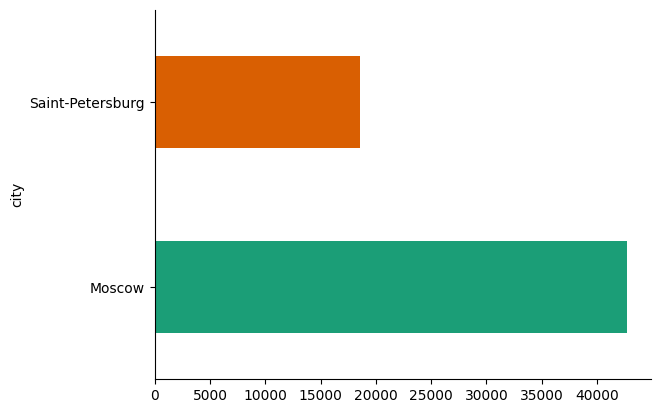

In [ ]:
# @title city

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Теперь избавьтесь от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

In [ ]:
df[['track', 'artist']].head()

,track,artist
0,Kamigata To Boots,The Mass Missile
1,Delayed Because of Accident,Andreas Rönnberg
2,Funiculì funiculà,Mario Lanza
3,Dragons in the Sunset,Fire + Ice
4,Soul People,Space Echo


In [ ]:
df['genre'].duplicated()

0        False
1         True
2        False
3        False
4        False
         ...  
61248     True
61249     True
61250     True
61251     True
61252     True
Name: genre, Length: 61253, dtype: bool

In [ ]:
df['genre'] = df['genre'].drop_duplicates()

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлеките нужный столбец датафрейма,
* примените к нему метод сортировки,
* для отсортированного столбца вызовите метод, который вернёт уникальные значения из столбца.

In [ ]:
df['genre'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
61248     True
61249     True
61250     True
61251     True
61252     True
Name: genre, Length: 61253, dtype: bool

In [ ]:
# Cписок уникальных названий жанров, отсортированный в алфавитном порядке
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Просмотрите список и найдите неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Вы увидите следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишите функцию `replace_wrong_genres()` с двумя параметрами:
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [ ]:
# Функция для замены неявных дубликатов
wrong_genres = ['hip', 'hop', 'hip-hop']
correct_genre = 'hiphop'
def replace_wrong_genres(wrong_genres, correct_genre):
  for i in wrong_genres:
    df['genre'] = df['genre'].replace([str(i)],[correct_genre])



replace_wrong_genres(wrong_genres, correct_genre)
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Вызовите `replace_wrong_genres()` и передайте ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [ ]:
# Устранение неявных дубликатов
# Код написал выше

Проверьте, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведите отсортированный список уникальных значений столбца `genre`:

In [ ]:
# Cписок уникальных названий жанров, отсортированный в алфавитном порядке. Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез.

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделите пользователей Москвы и Санкт-Петербурга
* Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


In [ ]:
df.head()

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,NaN,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


Для тренировки сначала выполните каждый из расчётов по отдельности.

Оцените активность пользователей в каждом городе. Сгруппируйте данные по городу и посчитайте прослушивания в каждой группе.



In [ ]:
# Подсчёт прослушиваний в каждом городе
df.groupby(df['city'], as_index=False).agg({'track': 'count'})

,city,track
0,Moscow,42741
1,Saint-Petersburg,18512


В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируйте данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтите, что в данных есть информация только о прослушиваниях только за эти дни.


In [ ]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby(df['day'], as_index=False).agg({'track': 'count'})

,day,track
0,Friday,21840
1,Monday,21354
2,Wednesday,18059


В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.

Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраните в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого примените последовательную фильтрацию с логической индексацией.

Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

In [ ]:
# Функция для подсчёта прослушиваний для конкретного города и дня.
df.groupby([df['city'], df['day']], as_index=False).agg({'track': 'count'})

,city,day,track
0,Moscow,Friday,15945
1,Moscow,Monday,15740
2,Moscow,Wednesday,11056
3,Saint-Petersburg,Friday,5895
4,Saint-Petersburg,Monday,5614
5,Saint-Petersburg,Wednesday,7003


In [ ]:
# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id.
# Это количество функция вернёт в качестве результата


# <создание функции number_tracks()>
# Объявляется функция с двумя параметрами: day, city.
# В переменной track_list сохраняются те строки таблицы df, для которых
# значение в столбце 'day' равно параметру day и одновременно значение
# в столбце 'city' равно параметру city (используйте последовательную фильтрацию
# с помощью логической индексации).
# В переменной track_list_count сохраняется число значений столбца 'user_id',
# рассчитанное методом count() для таблицы track_list.
# Функция возвращает число - значение track_list_count.


def number_tracks(day, city):

  track_list = df.query("day == @day & city == @city")
  track_list_count = track_list['user_id'].count()
  return track_list_count




In [ ]:
n = 'Monday'
track_list1 = df.query("day == @n")
track_list1.head()

,user_id,track,artist,genre,city,time,day
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
10,BC5A3A29,Gool la Mita,Shireen Abdul Wahab,world,Moscow,14:08:42,Monday
11,8B5192C0,Is There Anybody Out There? (Panoramic Paralys...,Pink Floyd Floydhead,electronic,Moscow,13:47:49,Monday
12,FF3FD2BD,Мина син генэ кирэк,Ильдар Хакимов,NaN,Moscow,09:19:49,Monday


Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [ ]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

15740

In [ ]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5614

In [ ]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

11056

In [ ]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

7003

In [ ]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

15945

In [ ]:
# количество прослушиваний в Санкт-Петербурге по пятницам
number_tracks('Friday', 'Saint-Petersburg')

5895

Создайте c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [ ]:
# Таблица с результатами
# city_day = pd.get_dummies(df['day'])
# city_day = city_day[['Monday', 'Wednesday', 'Friday']]
# city_day['city'] = df['city']
# city_day = city_day[['city', 'Monday', 'Wednesday', 'Friday']]
# city_day.head(100)

d = {'city': ['Moscow', 'Saint-Petersburg'],
     'monday': [number_tracks('Monday', 'Moscow'), number_tracks('Monday', 'Saint-Petersburg')],
     'wednesday': [number_tracks('Wednesday', 'Moscow'), number_tracks('Wednesday', 'Saint-Petersburg')],
     'friday': [number_tracks('Friday', 'Moscow'), number_tracks('Friday', 'Saint-Petersburg')]}

number_tracks_df = pd.DataFrame(data=d)
number_tracks_df


,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


In [ ]:
df.query("city=='Moscow'")

,user_id,track,artist,genre,city,time,day
1,55204538,Delayed Because of Accident,Andreas Rönnberg,NaN,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,NaN,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,NaN,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday
...,...,...,...,...,...,...,...
61247,83A474E7,I Worship Only What You Bleed,The Black Dahlia Murder,NaN,Moscow,21:07:12,Monday
61248,729CBB09,My Name,McLean,NaN,Moscow,13:32:28,Wednesday
61250,C5E3A0D5,Jalopiina,unknown,NaN,Moscow,20:09:26,Friday
61251,321D0506,Freight Train,Chas McDevitt,NaN,Moscow,21:43:59,Friday


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [ ]:
# получение таблицы moscow_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df.query("city=='Moscow'")
moscow_general.head()

,user_id,track,artist,genre,city,time,day
1,55204538,Delayed Because of Accident,Andreas Rönnberg,NaN,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,NaN,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,NaN,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday


In [ ]:
ex_moscow = moscow_general

In [ ]:
# df_1 = moscow_general.query(("datetime.datetime.fromisoformat(time) > datetime.datetime.fromisoformat(07:00:00)") & ("datetime.datetime.fromisoformat(time) < datetime.datetime.fromisoformat(13:00:00)"))
# df_1
from datetime import datetime
d1 = datetime.strptime('14:07:09', '%H:%M:%S')
print(d1)

1900-01-01 14:07:09


In [ ]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df.query("city=='Saint-Petersburg'")
spb_general.head()

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
9,E772D5C0,Pessimist,unknown,NaN,Saint-Petersburg,21:20:49,Wednesday


Создайте функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm',
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [ ]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)

def genre_weekday(table, day, time1, time2):
  genre_df = table.query("(day == @day) & (time > @time1) & (time < @time2)")
  genre_df_count = genre_df.groupby(['genre']).count()
  genre_df_sorted = genre_df_count = genre_df.groupby(['genre']).count().sort_values(by='genre')
  return genre_df_sorted.head(10)



Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [ ]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
genre_weekday(moscow_general, 'Monday', '07:00:00', '11:00:00')


,user_id,track,artist,city,time,day
genre,,,,,,
arabesk,1,1,1,1,1,1
beats,1,1,1,1,1,1
brazilian,1,1,1,1,1,1
breakbeat,1,1,1,1,1,1
broadway,1,1,1,1,1,1
comedy,1,1,1,1,1,1
dance,1,1,1,1,1,1
dnb,1,1,1,1,1,1
gospel,1,1,1,1,1,1


In [ ]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00:00', '11:00:00')

,track
genre,
emo,1
folk,1
karaoke,1
relax,1
shanson,1
soul,1
spiritual,1
ukrrock,1


In [ ]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00:00', '23:00:00')

,track
genre,
arena,1
grunge,1
türkçe,1
tanzorchester,1
speech,1
religious,1
other,1
mediterranean,1
loungeelectronic,1


In [ ]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00:00', '23:00:00')

,track
genre,
americana,1
ethnic,1
hardtechno,1
instrumental,1
metal,1
mpb,1
poprussian,1
rap,1


**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [ ]:
# одной строкой: группировка таблицы moscow_general по столбцу 'genre',
# подсчёт числа значений 'genre' в этой группировке методом count(),
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres

moscow_genres_1 = moscow_general.groupby(['genre']).agg({'artist': 'count'}).sort_values(by='artist', ascending=False)
moscow_genres_1.head()


,artist
genre,
hiphop,3
acid,1
numetal,1
old,1
opera,1


Выведите на экран первые десять строк `moscow_genres`:

In [ ]:
# просмотр первых 10 строк moscow_genres
moscow_genres_1.head(10)

,artist
genre,
hiphop,3
acid,1
numetal,1
old,1
opera,1
orchestral,1
other,1
piano,1
podcasts,1


Теперь повторите то же и для Петербурга.

Сгруппируйте таблицу `spb_general` по жанру. Посчитайте прослушивания треков каждого жанра. Результат отсортируйте в порядке убывания и сохраните в таблице `spb_genres`:


In [ ]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre',
# подсчёт числа значений 'genre' в этой группировке методом count(),
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres_1 = spb_general.groupby(['genre']).agg({'track': 'count'}).sort_values(by='track', ascending=False)
spb_genres_1.head()

,track
genre,
acoustic,1
adult,1
punk,1
punjabi,1
progressive,1


Выведите на экран первые десять строк `spb_genres`:

In [ ]:
# просмотр первых 10 строк spb_genres
spb_genres_1.head(10)

,track
genre,
acoustic,1
adult,1
punk,1
punjabi,1
progressive,1
progmetal,1
postrock,1
posthardcore,1
post,1


**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге.


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге.

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных.
